In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

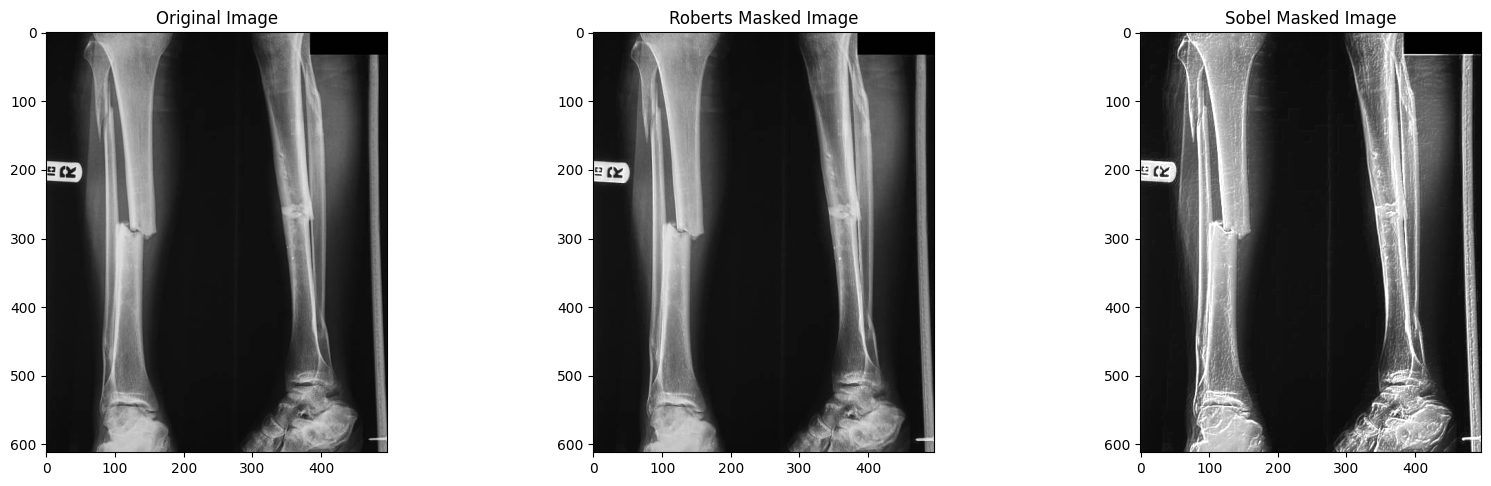

In [13]:
# Load the image (grayscale)
image = cv2.imread('../images/fracture.jpg', cv2.IMREAD_GRAYSCALE)  # Load as grayscale

# Define Roberts Cross Gradient Masks
roberts_x = np.array([[1, 0], [0, -1]], dtype=np.float32)  # Gx kernel
roberts_y = np.array([[0, 1], [-1, 0]], dtype=np.float32)  # Gy kernel

# Apply Roberts operator
roberts_gradient_x = cv2.filter2D(image, -1, roberts_x)  # (src=image, ddepth=-1, kernel=roberts_x)
roberts_gradient_y = cv2.filter2D(image, -1, roberts_y)  # (src=image, ddepth=-1, kernel=roberts_y)
roberts_combined = cv2.addWeighted(roberts_gradient_x, 0.5, roberts_gradient_y, 0.5, 0)  # Combine both gradients
robert_masked_image = cv2.addWeighted(image, 1, roberts_combined, 1.5, 0)

# Define Sobel Masks
sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.float32)  # Gx kernel
sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype=np.float32)  # Gy kernel

# Apply Sobel operator
sobel_gradient_x = cv2.filter2D(image, -1, sobel_x)  # (src=image, ddepth=-1, kernel=sobel_x)
sobel_gradient_y = cv2.filter2D(image, -1, sobel_y)  # (src=image, ddepth=-1, kernel=sobel_y)
sobel_combined = cv2.addWeighted(sobel_gradient_x, 0.5, sobel_gradient_y, 0.5, 0)  # Combine both gradients
sobel_masked_image = cv2.addWeighted(image, 1, sobel_combined, 1.5, 1)


# Display results
plt.figure(figsize=(20, 12))

plt.subplot(2, 3, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')

# plt.subplot(2, 2, 2)
# plt.title('Roberts X Gradient')
# plt.imshow(roberts_gradient_x, cmap='gray')

# plt.subplot(2, 2, 3)
# plt.title('Roberts Y Gradient')
# plt.imshow(roberts_gradient_y, cmap='gray')

plt.subplot(2, 3, 2)
plt.title('Roberts Masked Image')
plt.imshow(robert_masked_image, cmap='gray')

# plt.figure(figsize=(15, 8))

# plt.subplot(2, 2, 1)
# plt.title('Sobel X Gradient')
# plt.imshow(sobel_gradient_x, cmap='gray')

# plt.subplot(2, 2, 2)
# plt.title('Sobel Y Gradient')
# plt.imshow(sobel_gradient_y, cmap='gray')

plt.subplot(2, 3, 3)
plt.title('Sobel Masked Image')
plt.imshow(sobel_masked_image, cmap='gray')

plt.show()
